In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
from ipdb import set_trace as mybreak
import pyicon as pyic
import cartopy.crs as ccrs
import glob
import pickle
import maps_icon_smt_temp as smt
import datetime
from matplotlib.patches import Rectangle
import xarray as xr
import seawater as sw
import matplotlib.gridspec as gridspec

from icon_smt_levels import dzw, dzt, depthc, depthi

xarray
done xarray


In [3]:
run      = 'ngSMT_tke'
savefig  = False
path_fig = '../pics/'
nnf      = 0

gname = 'smt'
lev   = 'L128'

#path_data    = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/????-??/'
#fpath_tgrid = '/mnt/lustre01/work/mh0287/users/leonidas/icon/submeso/grid/cell_grid-OceanOnly_SubmesoNA_2500m_srtm30-icon.nc'
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
fpath_Tri    = '/mnt/lustre01/work/mh0033/m300602/tmp/Tri.pkl'

path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
# fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.npz'
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

In [8]:
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
f = Dataset(fpath_tgrid, 'r')
clon = f.variables['clon'][:] * 180./np.pi # center longitude
clat = f.variables['clat'][:] * 180./np.pi # center latitude
f.close()

In [4]:
# load interpolated temperature and salinity
path_data    = '/work/mh0033/u241317/smt/results/pp_calc_T.nc'
dt = xr.open_dataset(path_data)
#to = dt.T.isel(depthc=slice(1,5)).data
path_data    = '/work/mh0033/u241317/smt/results/pp_calc_S.nc'
ds = xr.open_dataset(path_data)
#so = ds.S.isel(depthc=slice(1,5)).data

In [5]:
lon_reg = [-75, -55]
lat_reg = [33, 43]
lon_regm = [-65, -64]
lat_regm = [39.4, 40.2]
lon_regs = [-64.8, -64.6]
lat_regs = [39.6, 39.8]

In [7]:
cclat1 = np.argmin(clat-40)
cclon1 = np.argmin(clon+64.5)

In [8]:
dt = dt.assign_coords({"clon": ("cc",clon)})

In [9]:
dt = dt.assign_coords({"clat": ("cc",clat)})

In [10]:
A = dt.isel(depthc=4).T
lon_reg_2 = lon_reg
lat_reg_2 = lat_reg
 

hca, hcb = pyic.arrange_axes(1, 2, plot_cb=True, asp=0.5, fig_size_fac=2)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg_2, lat_reg=lat_reg_2)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, rasterized=False)
ax.set_title('temperature')

lon_reg_2 = lon_regm
lat_reg_2 = lat_regm

lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg_2, lat_reg=lat_reg_2)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, rasterized=False)
ax.set_title('temperature')


#for ax in hca:
#    pyic.plot_settings(ax, xlim=lon_reg_2, ylim=lat_reg_2)

toi.min() 1.6964794
toi.max() 22.676373
toi.min() 12.376657
toi.max() 16.900589


Text(0.5, 1.0, 'temperature')

In [9]:
lon0, lat0 = -64.5, 40
lon0, lat0 = -64.15, 39.61
#lon0, lat0 = -75, 38
ic = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 
print(ic); print(clon[ic]); print(clat[ic])

13081903
-64.15043972837536
39.609447249483125


In [9]:
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T

g     = 9.80665
rho0  = 1025.022
rhop  = sw.dens(so[:], to[:], depthc[:])
rhop1 = sw.dens(so[1:], to[1:], depthc[1:])
rhop2 = sw.dens(so[:-1], to[:-1], depthc[:-1])
b     = - g * (rhop - rho0)/rho0
N2    = - g/rho0 * (rhop2 - rhop1) / dzw[1:] # dbdz
print('N2 max', N2.max(), 'N2 min', N2.min())

N2 max 9.764146983536515e-05 N2 min -0.0004266394190610066


In [10]:
N2.shape

(111,)

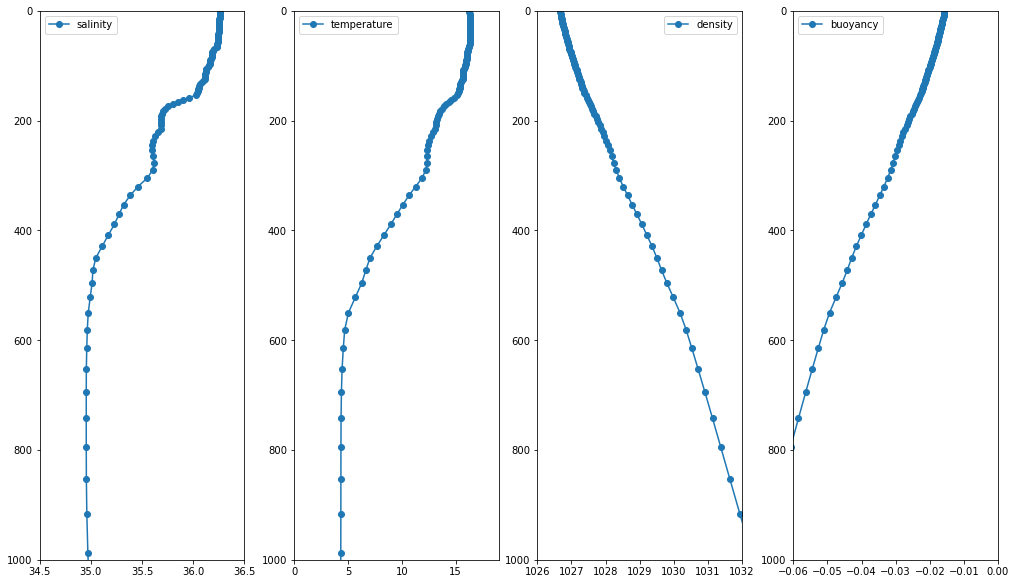

In [78]:

ylim = [1000,0]

fig2 = plt.figure(constrained_layout=True, figsize=(14,8))
spec2 = gridspec.GridSpec(ncols=4, nrows=1, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[0, 3])

#fig, ax = plt.subplots(ncols=2, nrows=2)
f2_ax1.plot(so, depthc, marker="o", label="salinity")
f2_ax1.set_xlim([34.5, 36.5])
f2_ax1.set_ylim(ylim)
f2_ax1.legend()

#ax[1] = plt.subplot(1,4,2)
f2_ax2.plot(to, depthc, marker="o", label="temperature")
f2_ax2.set_xlim([0, 19])
f2_ax2.set_ylim(ylim)
f2_ax2.legend()

#ax1 = plt.subplot(1,4,3)
f2_ax3.plot(rhop, depthc, marker="o", label="density")
f2_ax3.set_xlim([1026, 1032])
f2_ax3.set_ylim(ylim)
f2_ax3.legend()

#ax1 = plt.subplot(1,4,4)
f2_ax4.plot(b, depthc, marker="o", label="buoyancy")
f2_ax4.set_xlim([-0.06, 0])
f2_ax4.set_ylim(ylim)
f2_ax4.legend()

#plt.tight_layout()
#plt.show()

In [49]:
path_data    = '/work/mh0033/u241317/smt/vh/pp_calc_v_h.nc'
dv = xr.open_dataset(path_data)
path_data    = '/work/mh0033/u241317/smt/results/pp_calc_w_p.nc'
dw = xr.open_dataset(path_data)

In [127]:
N2.shape

(111,)

In [124]:
u0 = dv.isel(cc=ic).u
v0 = dv.isel(cc=ic).v
w0 = dw.isel(vert_velocity=ic).w

In [134]:
ylim = [6000,0]

fig2 = plt.figure(constrained_layout=True, figsize=(14,8))
spec2 = gridspec.GridSpec(ncols=4, nrows=1, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[0, 3])

#fig, ax = plt.subplots(ncols=2, nrows=2)
f2_ax1.plot(u0, depthc, marker="o", label="u")
#f2_ax1.set_xlim([34.5, 36.5])
f2_ax1.set_ylim(ylim)
f2_ax1.legend()

#ax[1] = plt.subplot(1,4,2)
f2_ax2.plot(v0, depthc, marker="o", label="v")
#f2_ax2.set_xlim([0, 19])
f2_ax2.set_ylim(ylim)
f2_ax2.legend()

#ax1 = plt.subplot(1,4,3)
f2_ax3.plot(w0[:-1], dw.depthi[:-1], marker="o", label="w")
#f2_ax3.set_xlim([0.014, 0.018])
f2_ax3.set_ylim(ylim)
f2_ax3.legend()

#ax1 = plt.subplot(1,4,4)
f2_ax4.plot(N2[:-1], depthi[1:-2], marker="o", label="N2")  #hoe data range N2[:], depthi[1:-1]
#f2_ax4.set_xlim([0, 1e-3])
f2_ax4.set_ylim(ylim)
f2_ax4.legend()

## calc mixxed layer depth

In [72]:
# MLD by Levitus % should be interpolated to cell surface
#' Spall et al. [2000], North Atlantic ind DT =0.5C 0 m arbitrary'
t_surf = to[0].data
print('Surface Temperature is', t_surf)
for d in range(depthc.size):
    tdiff = np.sqrt((t_surf - to[d])**2)
    if tdiff >= 0.5:
        print('Mixed Layer depth is', depthc[d])
        break

Surface Temperature is 16.259699
Mixed Layer depth is 105.5


In [73]:
# Montegut dt=0.2 dsigma = 0.03 zref = 10
z_10 = np.argmin((depthc-10)**2)
t_10 = to[z_10].data
print('Temperature at 10m is', t_10)
for d in range(depthc.size):
    tdiff = np.sqrt((t_10 - to[d])**2)
    if tdiff >= 0.2:
        print('Mixed Layer depth is', depthc[d])
        break

Temperature at 10m is 16.29726
Mixed Layer depth is 75.5


In [74]:
# Montegut dt=0.2 dsigma = 0.03 zref = 10
z_10 = np.argmin((depthc-10)**2)
rho_10 = rhop[z_10]
print('Density at 10m is', rho_10)
for d in range(depthc.size):
    rhodiff = np.sqrt((rho_10 - rhop[d])**2)
    if rhodiff >= 0.03:
        print('Mixed Layer depth is', depthc[d])
        break

Density at 10m is 1026.6896034000517
Mixed Layer depth is 18.5


## calc Richardsonnumber at one location

In [6]:
path_data    = '/work/mh0033/u241317/smt/dudz/pp_calc_dudz.nc'
dU = xr.open_dataset(path_data)

In [10]:
dudz_squared = dU.dudz.isel(cc=ic).data

In [11]:
f=2*2*np.pi/86400*np.sin(clat[ic]*np.pi/180.)
#f = 1e-4
#Ri = (N2[:] * f**2) / (dudz**2 + dvdz**2)
Ri_ub = (N2[:]) / (dudz_squared[1:-1] + 1e-10)
print('Ri max', Ri_ub.max(), 'Ri min', Ri_ub.min())

NameError: name 'N2' is not defined

Text(0.5, 0, 'Ri')

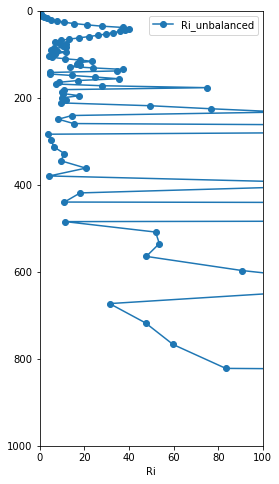

In [259]:
ylim = [1000,0]

fig, ax = plt.subplots(figsize=(4,8))
ax.plot(Ri_ub, depthi[1:-1], marker="o", label="Ri_unbalanced")

ax.set_xlim([0.0,100])
ax.set_ylim(ylim)
ax.legend()
ax.set_xlabel('Ri')

In [63]:
Ri.min()

-2.256240183563644e-05

In [65]:
print('N2 max', N2.max(), 'N2 min', N2.min())

N" max 7.309914969648795e-05 N2 min -0.0004265175864153565


In [92]:
f

9.272803817989053e-05

## plot dudz

toi.min() 9.627646e-11
toi.max() 0.0051503773
toi.min() 4.650489e-06
toi.max() 6.0607046e-05


Text(0.5, 1.0, 'dudz^2 + dvdz^2')

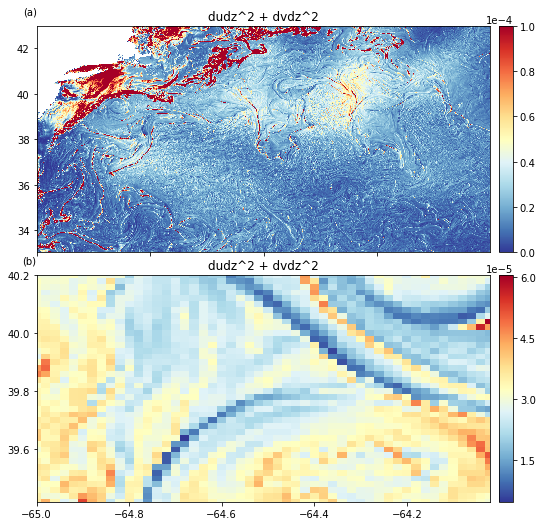

In [107]:
A = dU.dudz.isel(depthi=3)
lon_reg_2 = lon_reg
lat_reg_2 = lat_reg
 

hca, hcb = pyic.arrange_axes(1, 2, plot_cb=True, asp=0.5, fig_size_fac=2)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg_2, lat_reg=lat_reg_2)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax,  clim=([0, 1e-4]), rasterized=False)
ax.set_title('dudz^2 + dvdz^2')

lon_reg_2 = lon_regm
lat_reg_2 = lat_regm

lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg_2, lat_reg=lat_reg_2)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, rasterized=False)
ax.set_title('dudz^2 + dvdz^2')

## plot u v

In [20]:
path_data    = '/work/mh0033/u241317/smt/vh/pp_calc_v_h.nc'
dv = xr.open_dataset(path_data)

In [25]:
u = dv.isel(depthc=5).u
v = dv.isel(depthc=5).v

In [18]:
u

<xarray.DataArray 'dbdx' (cc: 59799625)>
[59799625 values with dtype=float32]
Coordinates:
    depthc   float32 9.969e+36
Dimensions without coordinates: cc

In [26]:
lon, lat, toi = pyic.interp_to_rectgrid(u, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)

hca, hcb = pyic.arrange_axes(1, 2, plot_cb=True, asp=0.5, fig_size_fac=3)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  

ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, rasterized=False)
ax.set_title('Velocity in x m/s')

lon, lat, toi = pyic.interp_to_rectgrid(v, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, rasterized=False)
ax.set_title('Velocity in y m/s')

for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

toi.min() %d -2.1637318
toi.max() %d 2.594142


## compare dudz to 1/f dbdx unbalanced to balanced gradient

In [14]:
path_data    = '/work/mh0033/u241317/smt/db/pp_calc_db.nc'
db = xr.open_dataset(path_data)

In [15]:
dbdx = db.dbdx.isel(cc=ic)
dbdy = db.dbdy.isel(cc=ic)

In [16]:
balanced = 1/(f**2) * (dbdx**2 + dbdy**2)

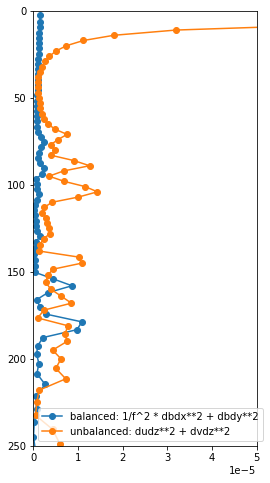

In [43]:
ylim = [250,0]

fig, ax = plt.subplots(figsize=(4,8))
ax.plot(balanced, depthc[:], marker="o", label="balanced: 1/f^2 * dbdx**2 + dbdy**2")
ax.plot(dudz_squared[1:-1], depthi[1:-1], marker="o", label="unbalanced: dudz**2 + dvdz**2")
ax.set_xlim([0.0,5e-5])
ax.set_ylim(ylim)
ax.legend()
#ax.set_xlabel('dbdx + dbdy')

### smoothing

In [42]:
from scipy.signal import savgol_filter

In [101]:
dbdx_squared_hat = savgol_filter(dbdx_squared, 21,3)

In [102]:
#balanced and smoothed

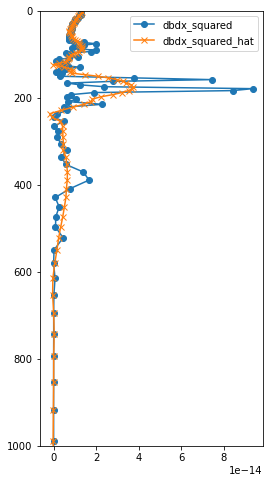

In [103]:
ylim = [1000,0]

fig, ax = plt.subplots(figsize=(4,8))
ax.plot(dbdx_squared, depthc[:], marker="o", label="dbdx_squared")
ax.plot(dbdx_squared_hat, depthc[:], marker="x", label="dbdx_squared_hat")
#ax.set_xlim([0.0,5e-5])
ax.set_ylim(ylim)
ax.legend()
#ax.set_xlabel('dbdx + dbdy')

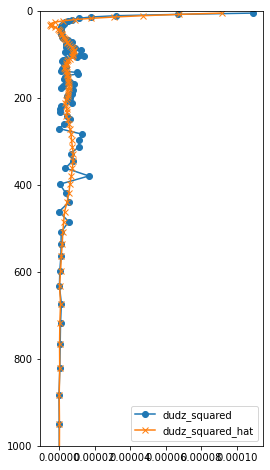

In [104]:
## unbalanced
dudz_squared_hat = savgol_filter(dudz_squared[1:-1], 21,3)

ylim = [1000,0]

fig, ax = plt.subplots(figsize=(4,8))
ax.plot(dudz_squared[1:-1], depthi[1:-1], marker="o", label="dudz_squared")
ax.plot(dudz_squared_hat, depthi[1:-1], marker="x", label="dudz_squared_hat")
#ax.set_xlim([0.0,5e-5])
ax.set_ylim(ylim)
ax.legend()
#ax.set_xlabel('dbdx + dbdy')

## calc Ri balanced

In [70]:
# interpolate dbdx to depthi
interp_coef = 1/(depthc[1:]-depthc[:-1]) * (depthi[1:-1] - depthc[:-1])
dbdx_squared = (dbdx**2 + dbdy**2)
M2 = dbdx_squared[:] + (dbdx_squared[1:]-dbdx_squared[:])*interp_coef[:]

In [229]:
interp_coef.shape

(111,)

In [269]:
f=2*2*np.pi/86400*np.sin(clat[ic]*np.pi/180.)
Ri_b = (N2 *((f**2) ) / (M2) + 1e-7) # 1/f^2 into denominator

/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)


Text(0.5, 0, 'Ri')

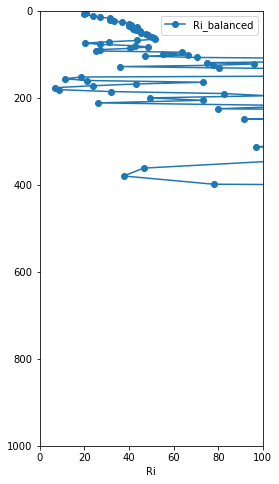

In [270]:
ylim = [1000,0]

fig, ax = plt.subplots(figsize=(4,8))
ax.plot(Ri_b[:-1], depthi[1:-2], marker="o", label="Ri_balanced")

ax.set_xlim([0.0,100])
ax.set_ylim(ylim)
ax.legend()
ax.set_xlabel('Ri')

## comparison of unbalanced and balanced Ri

In [227]:
ylim = [200,0]

fig, ax = plt.subplots(figsize=(4,8))
ax.plot(Ri_b[:-1], depthi[1:-2], marker="o", label="Ri_balanced")
ax.plot(Ri_ub[:-1], depthi[1:-2], marker="x", label="Ri_unbalanced")

#ax.set_xlim([0.0,100])
ax.set_ylim(ylim)
ax.legend()
ax.set_xlabel('Ri')

Text(0.5, 0, 'Ri')

### smoothed Richardsonnumber 

In [105]:
## balanced smoothed
M2s = dbdx_squared_hat[:-1] + (dbdx_squared_hat[1:]-dbdx_squared_hat[:-1])*interp_coef[:]
f=2*2*np.pi/86400*np.sin(clat[ic]*np.pi/180.)
Ri_bs = (N2 *((f**2) ) / (M2s)) # 1/f^2 into denominator

In [106]:
## unbalanced smoothed
f=2*2*np.pi/86400*np.sin(clat[ic]*np.pi/180.)
#f = 1e-4
#Ri = (N2[:] * f**2) / (dudz**2 + dvdz**2)
Ri_ubs = (N2[:]) / (dudz_squared_hat )

Text(0.5, 0, 'Ri')

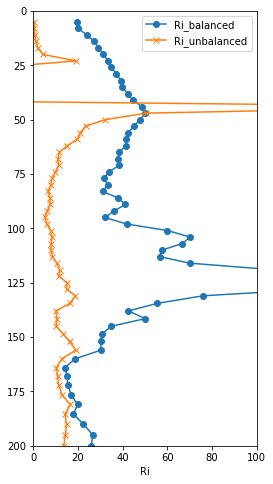

In [124]:
ylim = [200,0]

fig, ax = plt.subplots(figsize=(4,8))
ax.plot(Ri_bs[:-1], depthi[1:-2], marker="o", label="Ri_balanced")
ax.plot(Ri_ubs[:-1], depthi[1:-2], marker="x", label="Ri_unbalanced")

ax.set_xlim([0.0,100])
ax.set_ylim(ylim)
ax.legend()
ax.set_xlabel('Ri')